<a href="https://colab.research.google.com/github/MarcoRuizS/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/MarcoRuiz_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Guiada 2    
Algoritmos de Optimización    
Nombre: Marco Ruiz <br>
Link: https://colab.research.google.com/drive/1DGFIkZZqBfedTUi3q4sIvOBE9ezqnf5l <br>


### Problema: Viaje por el rio

In [0]:
# marca la distancia a cada punto
# incluimos valores altos para que no sea unidireccional

TARIFAS = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

In [0]:
def Precios(TARIFAS):
################################################################  
  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N] # n x n
  RUTA = [ [""]*N for i in [""]*N] # recorremos todos los nodos
  
  for i in range(N-1): #Calculo lo que me cuesta ir de i a j
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j): # valores intermedios de i a j
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

In [5]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [28]:
def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 0,6) 


La ruta es:


'0,0,2,5'

### Problema: Asignación de tareas


In [0]:
# El problema consiste en maximizar el rendimiento en cuanto a la asignación de N
# tareas a N agentes. Cada tarea solo puede ser asignado a un agente. 
#Ramificacion y poda

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [8]:
#Función objetivo costo 
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR
  
valor((0, 1, 2, 3),COSTES)

73

In [0]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]] #costo de valor fijo y encontramos la inferior

  #Estimacion
  for i in range(  len(COSTES)   ):
    if i not in S:
      VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ]) # 
  return VALOR

In [0]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [0]:
def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range(  len(COSTES)   ):
    if i not in S:
      VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

In [0]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

In [9]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
    print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)



La solucion final es: (0, 1, 2, 3)  en  1  iteraciones  para dimension:  4
La solucion final es: (0, 1, 2, 3)  en  2  iteraciones  para dimension:  4
La solucion final es: (0, 1, 2, 3)  en  3  iteraciones  para dimension:  4
La solucion final es: (0, 1, 2, 3)  en  4  iteraciones  para dimension:  4
La solucion final es: (0, 1, 2, 3)  en  5  iteraciones  para dimension:  4
La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  6  iteraciones  para dimension:  4
La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  7  iteraciones  para dimension:  4
La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  8  iteraciones  para dimension:  4
La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  9  iteraciones  para dimension:  4
La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  10  iteraciones  para dimension:  4
La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  11  iteraciones  para dimension:  4
La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  

#### Fuerza Brutal

In [0]:
# @calcular_Tiempo
from itertools import *

def fuerza_bruta(COSTES):
#Representacion de la solucion sera una tupla donde cada valor en la coordenada i-sima es la tarea asignado al gente i 
#Cuantas posibilidades hay? Complejidad factorial(exponencial)
#con dimension 11 se va a 1 minuto de ejecucion

    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(permutations(range(len(COSTES)))):
#         print(s,valor(s,COSTES))
        valor_tmp=valor(s,COSTES)
        if valor_tmp < mejor_valor:
            mejor_valor+valor_tmp
            mejor_solucion=s

    print ('La mejor solucion es:', mejor_solucion, 'con valor:', mejor_valor)
    

##### Dimensión 5 x 5

In [30]:
import numpy as np
import time

COSTES = np.random.random((5,5)) *100
print(COSTES)

start = time.time()
fuerza_bruta(COSTES)
end = time.time()

print ('Tiempo de Procesamiento: ',end-start)

[[ 0.57164441 26.34144294 56.83287993  2.29308589  7.74277526]
 [60.92391635 47.70221166 46.31393023  7.74428213 74.82675595]
 [82.45500258 52.92689692 31.70550425 84.74977964 30.41332165]
 [45.56066802 52.62885501 64.75697331 54.57835879 92.10677896]
 [25.93641082 94.16120666 82.88002752 60.40110353  5.70602951]]
La mejor solucion es: (4, 3, 2, 1, 0) con valor: 100000000000.0
Tiempo de Procesamiento:  0.0015320777893066406


##### Dimensión 9 x 9

In [31]:
import numpy as np
import time

COSTES = np.random.random((9,9)) *100
print(COSTES)

start = time.time()
fuerza_bruta(COSTES)
end = time.time()

print ('Tiempo de Procesamiento: ',end-start)

[[79.27412859 92.91166431  1.61513866 24.99436585 14.39436133 95.43769269
  23.43110028 18.51229975 60.80338969]
 [ 9.53629547 70.08799706 94.59923318 76.56694706 29.48727619 28.85691163
  75.19745473 77.88857708 26.58744824]
 [90.23450078 59.19705968 18.22018739 88.57243612 34.77703423  2.82003766
  93.67034963 20.46331033 97.75820834]
 [43.93803656 40.81351857 34.60738849 31.71521497 81.66252171 58.15523802
  42.7811715  37.01360422 47.92709251]
 [13.7538003  95.93298165 78.10956957 38.09962396 82.89471049 98.76287086
  68.57044453 75.68799969 10.4418176 ]
 [10.22366183 39.66657629 80.42882856 77.4047211  81.10500094 40.92878962
  39.83721964 19.26868007 46.48813109]
 [61.05715896 40.99910673 49.84425001 69.49766802 88.35046351 95.98237818
  81.8974022  33.91832976 88.02976568]
 [94.4299446  20.82723644 94.27657071  1.60811918 48.63617419 65.73925549
  61.89821588 69.44421773 93.81000415]
 [69.46566243 12.80012777 31.82240276 94.30823988 82.14491926 36.70842547
  83.24139514 36.86678

##### Dimensión 11 x 11

In [32]:
import numpy as np
import time

COSTES = np.random.random((11,11)) *100
print(COSTES)

start = time.time()
fuerza_bruta(COSTES)
end = time.time()

print ('Tiempo de Procesamiento: ',end-start)

[[98.31938596 83.56040329 70.15709468 40.21315814 70.42305259 52.96063858
  90.70919688  2.6391552  34.03242213 81.85925309 13.86619584]
 [45.28596295 90.10665623  7.21613611 94.97552209 49.88795483 11.77226166
  93.27658082 67.8834199  99.81501233 99.96710822 99.22692587]
 [70.27042859 43.20937333 59.72170821 81.0650764  95.15309317 21.15009691
  88.64226499  0.46095027 10.65944004 22.43484257 29.75788386]
 [62.96043079 79.47146011  4.42738194 54.07739645 11.83236206 97.65805273
  91.57398353 46.05406822 45.84589003  2.33416037 18.98024497]
 [97.2155466  25.48652095 13.52188499 11.58012537 95.20227263  1.27476994
  87.64652409 63.43014358 21.78444908 89.13764413 89.90379   ]
 [49.84113677 91.2117334  93.24260809 66.14212256  5.50363311 50.01567328
  78.3615478  91.82202034 48.3937085  41.88809576 39.91668834]
 [26.51167334 63.11482339 50.57670916 51.79332474  5.54948968 29.94315315
  65.02330698 51.59617825 69.7964939  47.0199351  26.91104598]
 [56.82926222 90.92887436  6.3874887  26.

##### Grafica Tiempo De Ejecución  Vs Dimensión Del Costo

Text(0.5, 0, 'Dimensión')

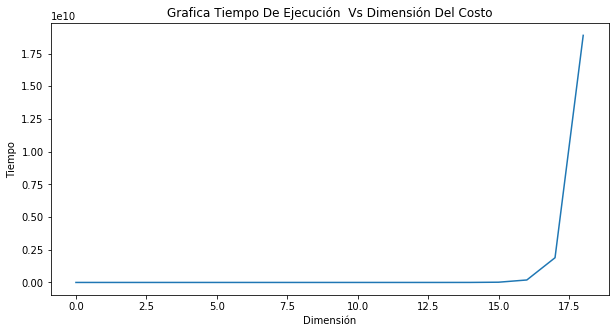

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
Matriz=[0,1.889E-08,1.889E-07,0.000001889,0.00001889,0.0001889,0.001532,0.01889,0.1889,1.9079,18.895,247.65,1889.18890,188900,1889000,18890000,188900000,1889000000,18890000000]
fig, ax=plt.subplots(figsize=(10,5))
plt.plot(Matriz)

ax.set_title('Grafica Tiempo De Ejecución  Vs Dimensión Del Costo')
ax.set_ylabel('Tiempo')
ax.set_xlabel('Dimensión')


Con dimensión 5 el tiempo de ejecución es de 0.001532     
Con dimensión 8 el tiempo de ejecución es de 0.1884    
Con dimensión 9 el tiempo de ejecución es de 1.9079  
Con dimensión 10 el tiempo de ejecución es de 20.2124    
Con dimensión 11 el tiempo de ejecución es de 247.6532   
Con dimensión 12 el tiempo de ejecución es de 2400.87 

La complejidad es exponencial por lo que pasado de la dimensión 12 del    
costo se hace muy grande para ser una opción valida.